In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
import pickle

In [2]:
with open("dataset/mnist/train_df.pkl", "rb") as f:
    train_df = pickle.load(f)

with open("dataset/mnist/test_df.pkl", "rb") as f:
    test_df = pickle.load(f)

In [3]:
print(train_df['images'].shape)

(60000, 28, 28)


# Visualize the training dataset

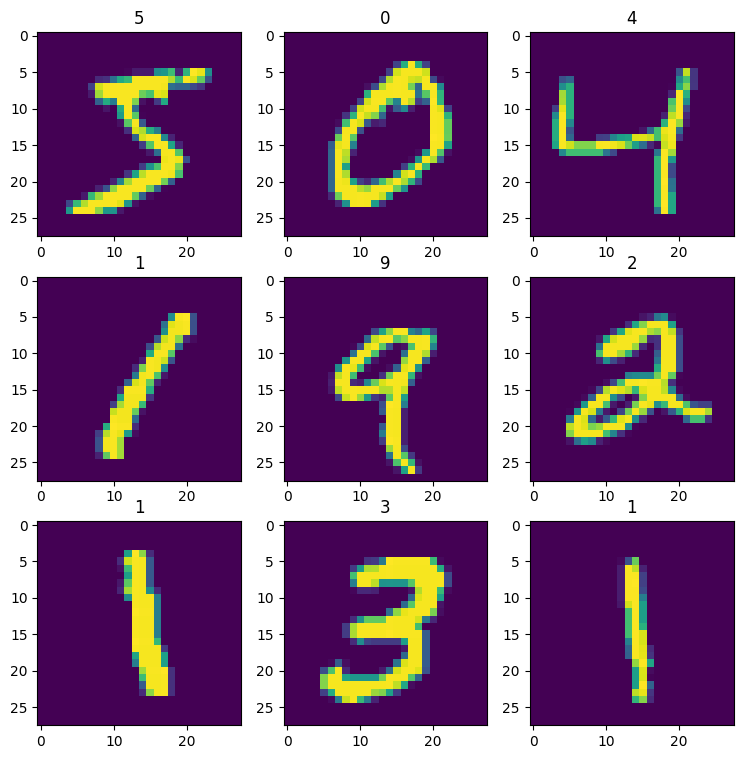

In [4]:
plt.figure(figsize=(9, 9))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_df['images'][i])
    plt.title(train_df['labels'][i])
plt.show()

# Create a neural network model

- Input image
- standardize the image
- stretch it to a vector
- 2 hidden layers
- output layer with 10 units with softmax

In [5]:
input_layer = tf.keras.Input(shape=(28, 28), name='input_layer')
rescale = tf.keras.layers.Rescaling(1./255, name='standardize')(input_layer)

flatten = tf.keras.layers.Flatten(name='stretch')(rescale)
h1 = tf.keras.layers.Dense(256, activation='elu', name='hidden_1')(flatten)
h2 = tf.keras.layers.Dense(128, activation='elu', name='hidden_2')(h1)
print(h2)
h3 = tf.keras.layers.Dense(128, activation='elu', name='hidden_3')(flatten)
print(h3)
out = tf.keras.layers.Dense(10, activation='softmax', name='output')(h2)

model = tf.keras.Model(inputs=input_layer, outputs=out)

KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='hidden_2/Elu:0', description="created by layer 'hidden_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='hidden_3/Elu:0', description="created by layer 'hidden_3'")


In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 standardize (Rescaling)     (None, 28, 28)            0         
                                                                 
 stretch (Flatten)           (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 256)               200960    
                                                                 
 hidden_2 (Dense)            (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable

In [7]:
model.compile(optimizer='Nadam', 
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

# Train the model for 5 epochs

In [8]:
model.fit(train_df['images'], train_df['labels'], epochs=5, batch_size=512)

Epoch 1/5
118/118 [==============================] - 3s 15ms/step - loss: 0.4471 - accuracy: 0.8742
Epoch 2/5
118/118 [==============================] - 2s 16ms/step - loss: 0.2226 - accuracy: 0.9361
Epoch 3/5
118/118 [==============================] - 2s 15ms/step - loss: 0.1606 - accuracy: 0.9533
Epoch 4/5
118/118 [==============================] - 2s 17ms/step - loss: 0.1230 - accuracy: 0.9642
Epoch 5/5
118/118 [==============================] - 2s 17ms/step - loss: 0.0988 - accuracy: 0.9709


# Test the model

In [9]:
predictions = model.predict(test_df['images'], verbose=0)
eval_result = model.evaluate(test_df['images'], test_df['labels'])
print(f"Accuracy = {np.around(100*eval_result[1], 2)}%")

313/313 [==============================] - 2s 7ms/step - loss: 0.1688 - accuracy: 0.9445
Accuracy = 94.45%


# Visualize the test results

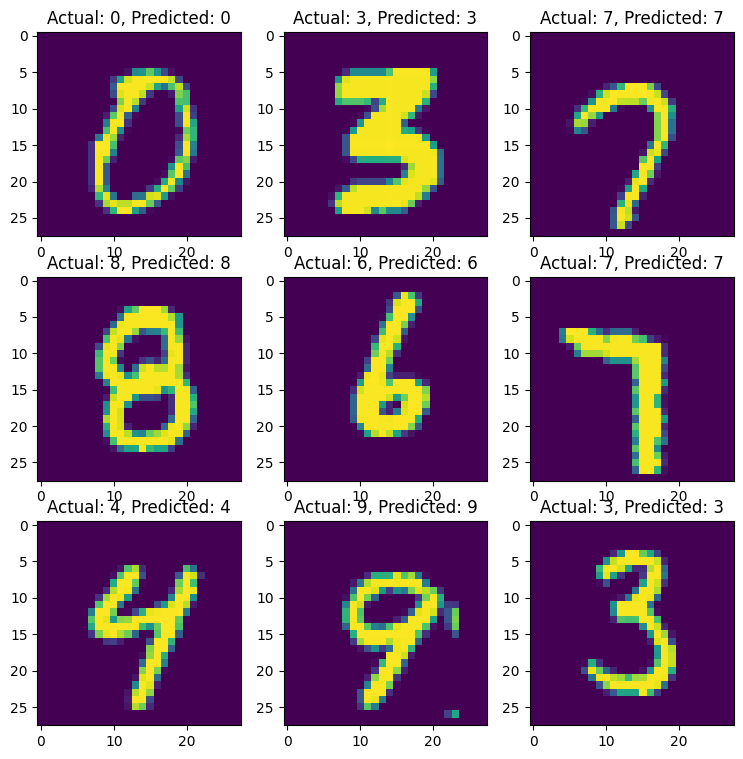

In [10]:
preds = np.argmax(predictions, axis=1)

indexes = np.arange(len(preds))
shuffle(indexes)

plt.figure(figsize=(9, 9))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_df['images'][indexes[i]])
    plt.title(f"Actual: {test_df['labels'][indexes[i]]}, Predicted: {preds[indexes[i]]}")
plt.show()

# Finding mis-classifications

In [11]:
misclassified = np.argwhere(preds != test_df['labels'])[:, 0]
# misclassified = np.argwhere(misclassified == True)
shuffle(misclassified)

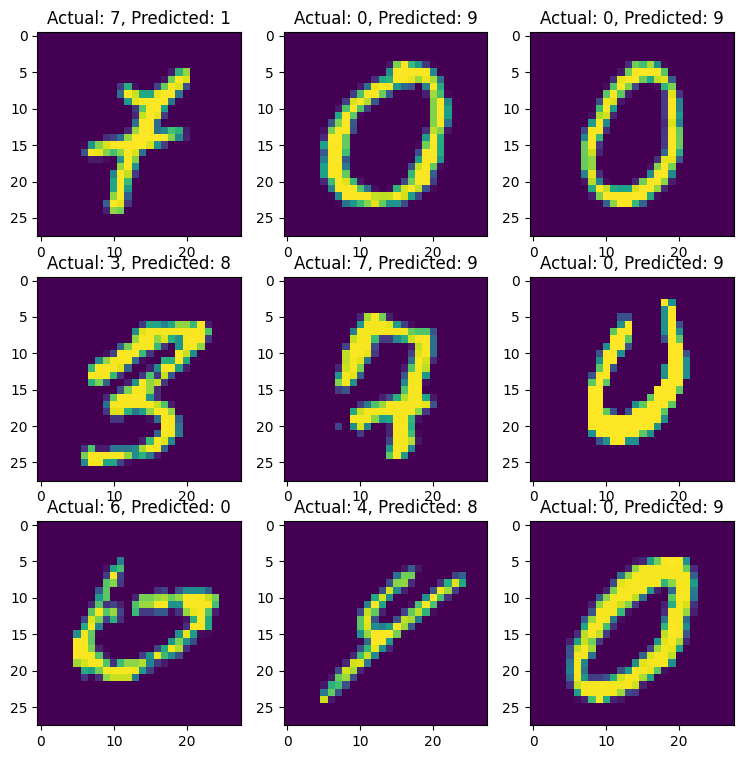

In [12]:
plt.figure(figsize=(9, 9))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_df['images'][misclassified[i]])
    plt.title(f"Actual: {test_df['labels'][misclassified[i]]}, Predicted: {preds[misclassified[i]]}")
plt.show()

In [13]:
model.save('model_weights/ANN_2_layer.h5')
model.save_weights('model_weights/ANN_2_layer_wts')